In [2]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# Load the dataset (replace 'path_to_your_csv' with the actual path to your CSV file)
data = pd.read_csv('post natal data.csv')

# Inspect the dataset
print(data.info())
print(data.head())

# Encode categorical variables
label_encoders = {}
for column in data.columns:
    if data[column].dtype == 'object':
        le = LabelEncoder()
        data[column] = le.fit_transform(data[column])
        label_encoders[column] = le

# Display the encoded dataset
print(data.head())

# Assuming 'Suicide attempt' is the target variable (replace it with the actual target)
target = data['Suicide attempt']
features = data.drop(columns=['Suicide attempt'])

# Further steps for regression analysis can be applied here if the target is suitable for regression


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1503 entries, 0 to 1502
Data columns (total 11 columns):
 #   Column                                     Non-Null Count  Dtype 
---  ------                                     --------------  ----- 
 0   Timestamp                                  1503 non-null   object
 1   Age                                        1503 non-null   object
 2   Feeling sad or Tearful                     1503 non-null   object
 3   Irritable towards baby & partner           1497 non-null   object
 4   Trouble sleeping at night                  1503 non-null   object
 5   Problems concentrating or making decision  1491 non-null   object
 6   Overeating or loss of appetite             1503 non-null   object
 7   Feeling anxious                            1503 non-null   object
 8   Feeling of guilt                           1494 non-null   object
 9   Problems of bonding with baby              1503 non-null   object
 10  Suicide attempt                     

In [3]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer

# Load the dataset
data = pd.read_csv("post natal data.csv")

# Drop the Timestamp column as it is not useful for regression
data = data.drop(columns=['Timestamp'])

# Handle missing values by imputing the most frequent value for categorical columns
imputer = SimpleImputer(strategy='most_frequent')
data_imputed = pd.DataFrame(imputer.fit_transform(data), columns=data.columns)

# Encode categorical variables using Label Encoding
label_encoders = {}
for column in data_imputed.columns:
    le = LabelEncoder()
    data_imputed[column] = le.fit_transform(data_imputed[column])
    label_encoders[column] = le

# Separate the target variable and features
target = data_imputed['Suicide attempt']
features = data_imputed.drop(columns=['Suicide attempt'])

# Display the encoded dataset
print(data_imputed.head())

# Further steps for regression analysis can be applied here if the target is suitable for regression


   Age  Feeling sad or Tearful  Irritable towards baby & partner  \
0    2                       2                                 2   
1    3                       2                                 0   
2    2                       2                                 0   
3    2                       2                                 2   
4    3                       2                                 0   

   Trouble sleeping at night  Problems concentrating or making decision  \
0                          1                                          2   
1                          0                                          2   
2                          2                                          2   
3                          2                                          2   
4                          1                                          2   

   Overeating or loss of appetite  Feeling anxious  Feeling of guilt  \
0                               2                1                 1

In [4]:
data_imputed.head(9)

,Age,Feeling sad or Tearful,Irritable towards baby & partner,Trouble sleeping at night,Problems concentrating or making decision,Overeating or loss of appetite,Feeling anxious,Feeling of guilt,Problems of bonding with baby,Suicide attempt
0,2,2,2,1,2,2,1,1,2,2
1,3,2,0,0,2,2,0,2,2,0
2,2,2,0,2,2,2,1,1,1,0
3,2,2,2,2,2,0,1,0,0,0
4,3,2,0,1,2,0,1,1,2,0
5,1,0,0,2,2,2,1,1,0,2
6,3,0,2,0,0,0,1,1,0,2
7,2,2,0,2,2,0,1,1,0,0
8,2,2,2,0,2,0,0,1,0,2


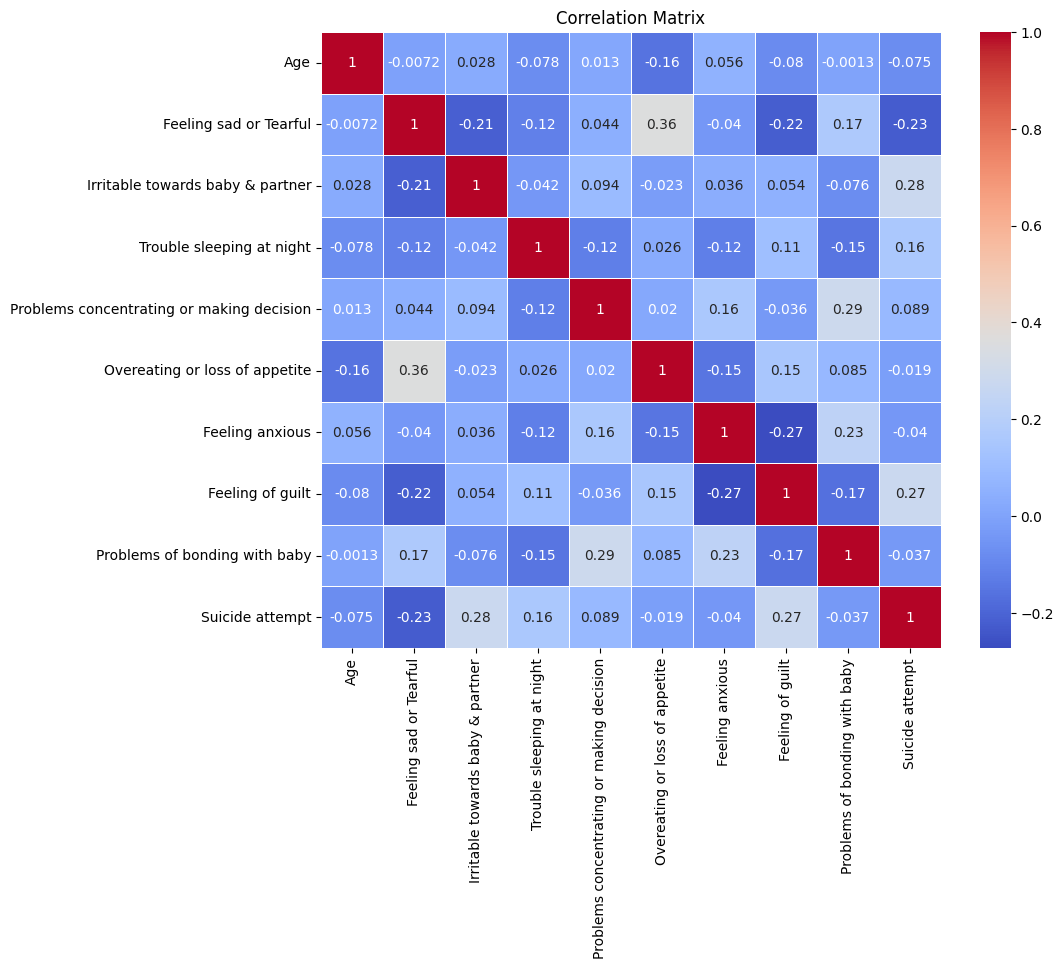

                                                Age  Feeling sad or Tearful  \
Age                                        1.000000               -0.007180   
Feeling sad or Tearful                    -0.007180                1.000000   
Irritable towards baby & partner           0.028088               -0.214887   
Trouble sleeping at night                 -0.078397               -0.117364   
Problems concentrating or making decision  0.013200                0.043697   
Overeating or loss of appetite            -0.158305                0.360815   
Feeling anxious                            0.056179               -0.039628   
Feeling of guilt                          -0.080359               -0.220073   
Problems of bonding with baby             -0.001325                0.166051   
Suicide attempt                           -0.074603               -0.225143   

                                           Irritable towards baby & partner  \
Age                                                

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
# Calculate the correlation matrix
correlation_matrix = data_imputed.corr()

# Plot the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

# Display the correlation matrix
print(correlation_matrix)
# Correlation Matrix Interpretation
# - Correlation Coefficient (r):
#   - Values range from -1 to 1.
#   - 1 indicates a perfect positive correlation.
#   - -1 indicates a perfect negative correlation.
#   - 0 indicates no correlation.
#
# Key Findings from the Correlation Matrix:
# 1. Age:
#    - Negatively correlated with Overeating or loss of appetite (-0.16), Feeling of guilt (-0.08), and Suicide attempt (-0.075).
#    - These correlations are weak, suggesting little to no relationship.
#
# 2. Feeling sad or Tearful:
#    - Positively correlated with Overeating or loss of appetite (0.36).
#    - Negatively correlated with Irritable towards baby & partner (-0.21) and Suicide attempt (-0.23).
#    - A moderate positive correlation with Overeating or loss of appetite suggests that feeling sad or tearful is somewhat related to changes in appetite.
#
# 3. Irritable towards baby & partner:
#    - Positively correlated with Suicide attempt (0.28).
#    - This moderate positive correlation indicates that irritability towards baby and partner is somewhat associated with an increased likelihood of suicide attempt.
#
# 4. Trouble sleeping at night:
#    - Positively correlated with Problems concentrating or making decision (0.16).
#    - This suggests a weak relationship where trouble sleeping might be related to concentration problems.
#
# 5. Problems concentrating or making decision:
#    - Positively correlated with Feeling of guilt (0.16).
#    - Indicates a weak positive relationship where concentration problems might be linked to feelings of guilt.
#
# 6. Overeating or loss of appetite:
#    - Positively correlated with Feeling sad or Tearful (0.36).
#    - Indicates that changes in appetite are moderately related to feeling sad or tearful.
#
# 7. Feeling anxious:
#    - Negatively correlated with Feeling of guilt (-0.27).
#    - Indicates a weak negative relationship where anxiety is somewhat associated with lower feelings of guilt.
#
# 8. Feeling of guilt:
#    - Positively correlated with Suicide attempt (0.27).
#    - Indicates a weak to moderate positive relationship where feelings of guilt are somewhat linked to the likelihood of a suicide attempt.
#
# 9. Problems of bonding with baby:
#    - Positively correlated with Feeling anxious (0.23).
#    - Indicates a weak relationship where problems bonding with the baby are related to feeling anxious.
#
# 10. Suicide attempt:
#     - Positively correlated with Irritable towards baby & partner (0.28), Feeling of guilt (0.27).
#     - Negatively correlated with Feeling sad or Tearful (-0.23).
#     - The correlations with Suicide attempt suggest that irritability towards baby and partner, and feelings of guilt have the strongest relationships, though they are still moderate.
#
# Summary:
# - Most of the correlations are weak (close to 0), indicating that there is no strong linear relationship between most pairs of variables.
# - The strongest correlations are between Feeling sad or Tearful and Overeating or loss of appetite (0.36), and Irritable towards baby & partner and Suicide attempt (0.28).
# - These findings can help in understanding which factors might be more closely associated with each other, providing insights into areas where interventions might be more focused.
#
# If you need further analysis or have specific questions about the data, feel free to ask!
